#  Clasificador de Spam by **José Manuel Pedro Méndez**.


In [ ]:
import numpy as np
from sklearn import linear_model, metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
dt = pd.read_csv('emails.csv')
dt.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
dt.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
# Eliminamos las filas que tienen datos nulos
data = dt.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = False)

In [ ]:
print(dt.isna().sum())
print(f'Suma Total de valores NULL: {sum(dt.isna().sum())}')

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
Suma Total de valores NULL: 0


In [ ]:
colums = dt.columns
print(colums)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [ ]:
print(dt.isna().sum())
print(f'Suma Total de valores NULL: {sum(dt.isna().sum())}')

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
Suma Total de valores NULL: 0


In [ ]:
df = dt.Prediction.value_counts()
df[0]

3672

In [ ]:
df[1]

1500

In [ ]:
# Verificamos que no tengamos filas duplicadas
print(f'Total de valores NULL: {sum(dt.isna().sum())}')
print(f'Datos duplicados: {dt.duplicated().sum()}', f'Forma de nuestros datos: {dt.shape}', sep='.\n' )

Total de valores NULL: 0
Datos duplicados: 0.
Forma de nuestros datos: (5172, 3002)


El conjunto de datos describe el comportamiento de nuestras cadenas que representan nuestros correos. La columna `Prediction` describe si el correofue fue clasificado como spam con`1` o si no fue `0`.

In [ ]:
print(f' # Correos detectados como spam: {df[1]}'
      f'\n Correos detectados como no spam: {df[0]}')

 #spam: 1347
 #non spam count: 3340


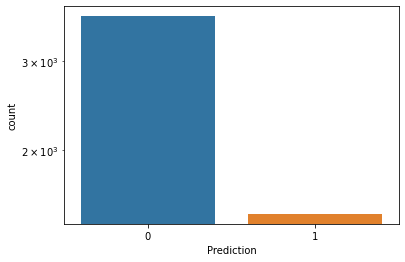

In [ ]:
import seaborn as sns
ax=sns.countplot(x='Prediction',data=dt);

ax.set_yscale('log') # puede ir lineal

In [ ]:
# NO EJECUTAR, era para ver una matriz de correlación pero tenemos demaciadas variables pero tarda demaciado y mi ram no da
import matplotlib.pyplot as plt
plt.figure(figsize = (40,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
# X representa las variables predictoras
X = dt.iloc[:, 1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# X representa las variable a predecir
y = dt.iloc[:, -1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [ ]:
# Dividimos nuestro conjunto de datos en los datos de prueba y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print(f' X_train:\n: {X_train.head()} \n',
      f' y_train:\n: {y_train.head()}\n')

 X_train:
:       the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
2382   32  25   14   16   15   2  193    7    4  41  ...             0   
3848   42  19    1    8    7   7  213    1    3  51  ...             0   
667     1   3    1    0    1   0   10    1    0   4  ...             0   
4641   14  11    1    5    4   6   72    8    3  17  ...             0   
3650    6   5    1    3    2   3   38    3    0   6  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
2382         0    0       0    0               0         0         0   1    0  
3848         0    0       0    1               0         4         0   3    0  
667          0    0       0    0               0         0         0   0    0  
4641         0    0       0    0               0         0         0   3    0  
3650         0    0       0    0               0         0         0   1    0  

[5 rows x 3000 columns] 
  y_train:
: 2382    0
3848    1
667 

In [ ]:
#  Regresion Logistica
params = {'C': [0.1, 0.2, 0.3, 0.4, 0.5,0.6]}
params

{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

La **regresión logística** es un método de clasificación que estima la probabilidad de que un evento ocurra.

A diferencia de una regresión lineal, la salida no es un un valor numérico continuo sino la probabilidad de que $Y = 1$ o $Y = 0$.

Si especificamos un umbral de probabilidad, por ejemplo $P > 0.5$, podemos utilizar la salida de una regresión logística para realizar clasificaciones binarias.


Usamos [GRidSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para encontrar el mejor parametro para nuestro estimador, en este caso, una regresión logistica, el cúal se encarga de realizar una búsqueda exhaustiva entre los valores de los parámetros especificados para un estimador.


In [ ]:
# Instancia de nuestra RL
logRe = LogisticRegression(solver= 'liblinear')

'''
* Nuestro estimador es una regresión logistica(logRe)
* params: parametros entre los que vamos a buscar el mejor
* en cuestion de la metrica _presicion_
* cv:4 número de folds
'''
searchLR = GridSearchCV(logRe, params, scoring='precision', cv=3)

searchLR.fit(X_train, y_train) # Realizamos el entramiento de nuestro modelo

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
             scoring='precision')

In [ ]:
# search.best_estimator_ representa la LR que dio la puntuación más alta
# es decir, la que tiene el mejor parametro
bestLR = searchLR.best_estimator_
bestLR

LogisticRegression(C=0.3, solver='liblinear')

Tomando nuestro umbral de probabilidad como $P=0.6$, y partir de nuestra matriz de probabilidades de predicción asignaremos $NoSpam = 0$ como predicción a los valores  con una probabilidad inferiores a nuestro umbral, y $Spam = 1$ a los valores superiores a nuestro umbral de probabilidad.

In [ ]:
y_predLR = bestLR.predict(X_test)
y_predLR

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Con cv= 3
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       929
           1       0.93      0.96      0.95       364

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293



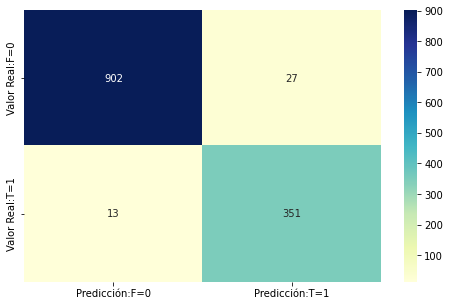

In [ ]:
import seaborn as sns
y_pred_LR_upd = bestLR.predict_proba(X_test)
umbral = 0.6
y_pred_LR_upd = np.where(y_pred_LR_upd[:, 1] < umbral, 0, 1)
cm = metrics.confusion_matrix(y_test, y_predLR)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicción:F=0','Predicción:T=1'],index=['Valor Real:F=0','Valor Real:T=1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");


In [ ]:
# Con cv= 4
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       929
           1       0.94      0.97      0.95       364

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.97      1293
weighted avg       0.97      0.97      0.97      1293



In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

s = f"""
      Falsos positivos del modelo  = {str(FP)} \n
      Precisión del modelo  = TP+TN/(TP+TN+FP+FN) = {str((TP+TN)/float(TP+TN+FP+FN))} \n
      Porcentaje de errores =         1-precisión = {str(1-((TP+TN)/float(TP+TN+FP+FN)))}\n
      Sensibilidad a clase positiva =  TP/(TP+FN) = {str(TP/float(TP+FN))} \n
      Especificidad a clase negativa = TN/(TN+FP) = {str(TN/float(TN+FP))} \n
      Valor predictivo positivo      = TP/(TP+FP) = {str(TP/float(TP+FP))} \n
      Valor predictivo negativo      = TN/(TN+FN) = {str(TN/float(TN+FN))} \n
      Tasa de verosimilitud de clase positiva = Sensibilidad/(1-Especificidad) = {str(sensitivity/(1-specificity))}\n
      Tasa de verosimilitud de clase negativa = (1-Sensibilidad)/Especificidad = {str((1-sensitivity)/specificity)}"""
print(s)

      
      Falsos positivos del modelo  = 27 

      Precisión del modelo  = TP+TN/(TP+TN+FP+FN) = 0.9690641918020109 

      Porcentaje de errores =         1-precisión = 0.030935808197989134

      Sensibilidad a clase positiva =  TP/(TP+FN) = 0.9642857142857143 

      Especificidad a clase negativa = TN/(TN+FP) = 0.9709364908503767 

      Valor predictivo positivo      = TP/(TP+FP) = 0.9285714285714286 

      Valor predictivo negativo      = TN/(TN+FN) = 0.985792349726776 

      Tasa de verosimilitud de clase positiva = Sensibilidad/(1-Especificidad) = 33.178571428571374

      Tasa de verosimilitud de clase negativa = (1-Sensibilidad)/Especificidad = 0.03678333861260689


In [ ]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_LR_upd)
Precision = metrics.precision_score(y_test, y_pred_LR_upd)
Recall = metrics.recall_score(y_test, y_pred_LR_upd)
print(f'Test_Accuracy:  {round(Test_Accuracy, 3)}\nTest_Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')

Test_Accuracy:  0.975
Test_Precision:  0.954
Recall:  0.959
